In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("C://Users//Hp//Desktop//EastWestAirlines1.csv",index_col=0)

In [3]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [4]:
df.index.rename('ID', inplace=True)
df.rename(columns={'Award?': 'Award'}, inplace=True)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


# about data information

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status


cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:






1 = under 5,000


2 = 5,000 - 10,000


3 = 10,001 - 25,000


4 = 25,001 - 50,000


5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [5]:
# baise information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In Dataset 11 features .there are no null values ,And  Data types are integer

<AxesSubplot:xlabel='ID'>

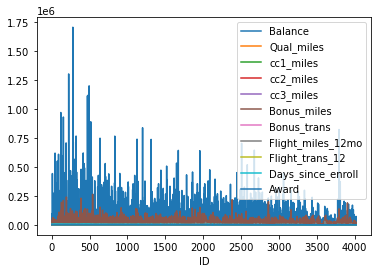

In [6]:
df.plot()

<AxesSubplot:>

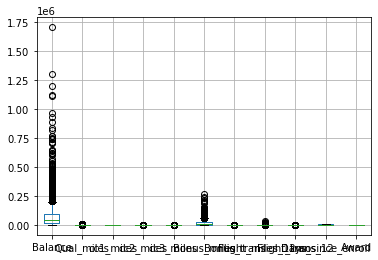

In [7]:
df.boxplot()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<AxesSubplot:>

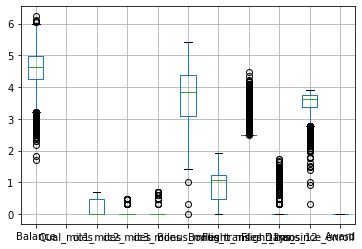

In [8]:
df.apply(np.log10).boxplot()

In [9]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# K-means Clustering

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [12]:
scaled_df=scaler.fit_transform(df.iloc[:,1:])

In [13]:
scaled_df

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

In [14]:
 from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

In [15]:
kmeans.inertia_

23772.87056380885

we take that n_clusters value is 4 we observated that kmeans inertia value is 23772.87

In [16]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[39990.00000000001,
 31994.05934079662,
 27514.811787685063,
 23772.87056380885,
 20301.459456585617,
 18344.471180477365,
 15550.247825458413,
 13959.671669697083,
 12704.208041215812,
 11704.073227712532]

wcss is show that if we take 1 cluster value so output the 39990, and 2 cluster value so output 31994 , 3 cluster value so output 27514

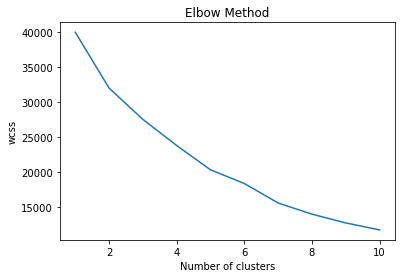

In [18]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Above the Elbow curve show the which number of cluster values given that best outcome ,the Elbow curve show  we may conclude that the  number of the clusters shall be taken as adn than  giving the best outcome

In [19]:
# Build Cluster algorthim
from sklearn.cluster import KMeans
clusters_new=KMeans(7,random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=7, random_state=42)

In [20]:
clusters_new.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [21]:
#assign clusters to the dataset
#df2_km["clusterID_km"] = clusters_new2.labels_
#df2_km.head()
df['clusterid_new1']=clusters_new.labels_

In [22]:
# these are standardized values
clusters_new.cluster_centers_

array([[-1.44972180e-01, -5.31293871e-01, -9.82418871e-02,
        -6.03097350e-02, -5.06723591e-01, -4.55609693e-01,
        -2.17791294e-01, -2.40009623e-01, -2.20525765e-01,
        -7.66919299e-01],
       [ 7.04065804e+00, -4.31702374e-03, -9.82418871e-02,
        -6.27665798e-02,  9.55601842e-02,  7.67900892e-02,
         3.48255260e-01,  3.91159384e-01, -1.08916294e-01,
         3.05478671e-01],
       [-1.56235600e-01, -6.68227273e-01,  9.03825361e+00,
        -6.27665798e-02, -1.01665326e-01,  6.17851143e-01,
         8.75493989e-02,  2.20346809e-01, -7.24639805e-02,
         5.17838824e-02],
       [-5.95715986e-02, -2.71382663e-01, -9.82418871e-02,
        -6.27665798e-02, -2.72146467e-01, -1.23119510e-01,
        -2.66018480e-02, -1.98892416e-02,  8.91231783e-02,
         1.30391816e+00],
       [-8.44329231e-02,  1.02208440e+00, -9.82418871e-02,
         1.56462993e+01,  3.17969131e+00,  1.71461374e+00,
         3.32926913e-02,  5.96953922e-02,  2.39872612e-01,
         3.

In [23]:
df.groupby('clusterid_new1').agg(['mean']).reset_index()

,clusterid_new1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,45331.720384,31.968825,1.328058,1.000000,1.000480,4908.511271,7.226859,155.140528,0.463309,3663.200959,0.000000
1,1,115243.642857,5590.535714,2.053571,1.000000,1.000000,19452.428571,12.339286,947.625000,2.857143,3893.660714,0.517857
2,2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,3,67879.314110,98.031902,1.685890,1.000000,1.000000,10573.067485,10.419632,422.812270,1.298160,4302.587730,1.000000
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,5,168254.958678,471.165289,2.305785,1.000000,1.000000,35148.925620,29.983471,6161.743802,17.842975,4641.537190,0.793388
6,6,130380.003472,66.550926,4.164352,1.000000,1.002315,48990.748843,20.071759,393.995370,1.193287,4984.019676,0.597222


In [24]:
df.groupby('clusterid_new1')

In [25]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new1
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
4018,64385,0,1,1,1,981,5,0,0,1395,1,3
4019,73597,0,3,1,1,25447,8,0,0,1402,1,3


In [26]:
df[df['clusterid_new1']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new1
ID,,,,,,,,,,,,
8,20856,0,1,1,1,5250,4,250,1,6938,1,3
18,13958,0,1,1,1,4291,5,0,0,6905,1,3
20,23354,0,3,1,1,10447,5,0,0,6896,1,3
22,185681,2024,1,1,1,13300,16,1800,9,6896,1,3
30,19221,0,1,1,1,4655,8,500,1,7896,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4010,11933,0,1,1,1,249,3,79,1,1412,1,3
4012,2622,0,1,1,1,1625,6,0,0,1404,1,3
4017,18476,0,1,1,1,8525,4,200,1,1403,1,3


In [27]:
df[df['clusterid_new1']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new1
ID,,,,,,,,,,,,
9,443003,0,3,2,1,1753,43,3850,12,6948,1,2
202,8669,0,1,3,1,11397,16,0,0,7486,1,2
230,117329,0,1,2,1,6448,11,0,0,7416,1,2
386,167670,0,1,3,1,15907,13,0,0,6994,0,2
398,11189,0,1,2,1,9044,20,0,0,8296,1,2
568,380930,0,2,2,1,22485,25,213,1,6539,1,2
804,55610,0,1,2,1,5095,13,0,0,6151,0,2
951,44824,0,1,3,1,21107,19,2000,4,5916,1,2
1161,84856,0,1,2,1,6894,13,0,0,5547,0,2


In [28]:
df.sort_values('clusterid_new1')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new1
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2470,26119,0,1,1,1,3189,6,0,0,3257,0,0
2472,14554,0,1,1,1,0,0,0,0,3237,0,0
2476,11952,0,1,1,1,0,0,0,0,3244,0,0
2478,94022,0,1,1,1,2585,14,0,0,3222,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
891,301447,0,5,1,1,63866,18,500,1,6004,1,6
2677,61081,0,4,1,1,37682,21,2000,4,2509,0,6
894,135168,0,4,1,1,29156,16,300,2,6002,0,6


In [29]:
df['clusterid_new1'].value_counts()

0    2085
6     864
3     815
5     121
1      56
2      43
4      15
Name: clusterid_new1, dtype: int64

# Hierarchical Clustering

In [30]:
df1=pd.read_csv("C://Users//Hp//Desktop//EastWestAirlines1.csv")

In [31]:
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [32]:
# Normalization function
#def norm_func(i):
 #       x=(i-i.min())/(i.max()-i.min())
  #      return(x)

In [33]:
#df1.iloc[:,1:]

In [34]:
from sklearn.preprocessing import MinMaxScaler
normalize=MinMaxScaler()
new_df=normalize.fit_transform(df1.iloc[:,1:].to_numpy())
df_norm=pd.DataFrame(new_df,columns=df1.columns[1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [35]:
# Normalized data frame (considering the numerical part of data)
#df1_norm = norm_func(df.iloc[:,1:])

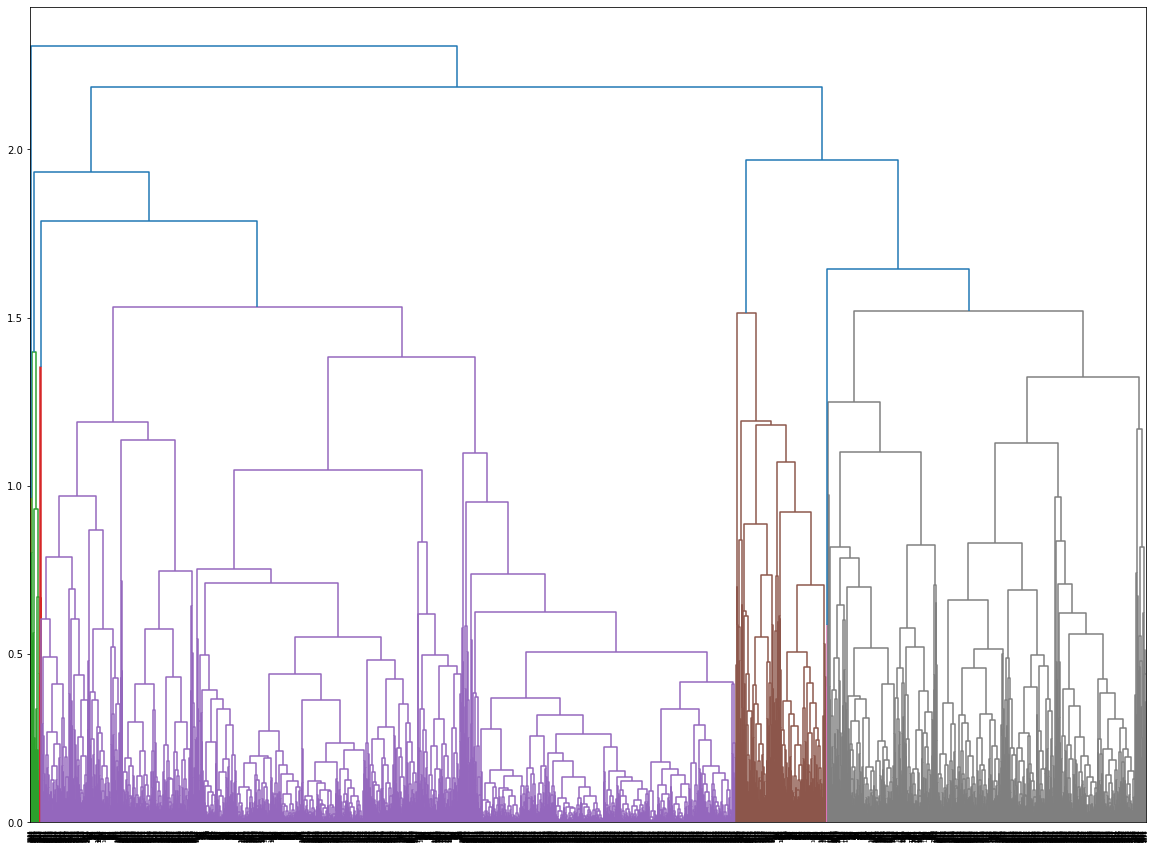

In [36]:
plt.figure(figsize=(20,15))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [37]:
# create clusters
hc = AgglomerativeClustering(n_clusters=9, affinity = 'euclidean', linkage = 'complete')

In [38]:
y_hc=hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [39]:
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,0
...,...
3994,4
3995,4
3996,4
3997,2


In [40]:
df_norm['h_clusterid']=Clusters

In [41]:
df_norm.sort_values('h_clusterid')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,0.191881,0.130248,1.00,0.0,0.0,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
687,0.028026,0.000000,1.00,0.0,0.0,0.336663,0.232558,0.008112,0.037736,0.762841,1.0,0
685,0.101794,0.000000,1.00,0.0,0.0,0.351753,0.290698,0.000000,0.000000,0.762841,1.0,0
3219,0.033079,0.000000,1.00,0.0,0.0,0.276485,0.279070,0.058409,0.075472,0.282373,1.0,0
670,0.026689,0.000000,0.75,0.0,0.0,0.188316,0.197674,0.010254,0.018868,0.768387,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
518,0.078635,0.000000,0.75,0.0,0.0,0.176749,0.151163,0.000000,0.000000,0.799976,0.0,8
515,0.203056,0.000000,1.00,0.0,0.0,0.241967,0.186047,0.000000,0.000000,0.800940,0.0,8
514,0.045126,0.000000,0.75,0.0,0.0,0.106472,0.197674,0.000000,0.000000,0.801061,0.0,8
2652,0.050605,0.000000,0.50,0.0,0.0,0.133887,0.174419,0.016225,0.018868,0.303955,0.0,8


In [42]:
df_norm['h_clusterid'].value_counts()

2    1935
4     750
8     556
3     390
0     325
1      31
5       4
6       4
7       4
Name: h_clusterid, dtype: int64

# DBSCAN

In [43]:
# Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Import .csv file and convert it to a DataFrame object
df=pd.read_csv("C://Users//Hp//Desktop//EastWestAirlines1.csv",index_col=1)

In [45]:
df

,ID#,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,,,,,,,,,,,
28143,1,0,1,1,1,174,1,0,0,7000,0
19244,2,0,1,1,1,215,2,0,0,6968,0
41354,3,0,1,1,1,4123,4,0,0,7034,0
14776,4,0,1,1,1,500,1,0,0,6952,0
97752,5,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
18476,4017,0,1,1,1,8525,4,200,1,1403,1
64385,4018,0,1,1,1,981,5,0,0,1395,1
73597,4019,0,3,1,1,25447,8,0,0,1402,1


In [46]:
array=df.values

In [47]:
array

array([[   1,    0,    1, ...,    0, 7000,    0],
       [   2,    0,    1, ...,    0, 6968,    0],
       [   3,    0,    1, ...,    0, 7034,    0],
       ...,
       [4019,    0,    3, ...,    0, 1402,    1],
       [4020,    0,    1, ...,    1, 1401,    0],
       [4021,    0,    1, ...,    0, 1398,    0]], dtype=int64)

In [48]:
norm_df_db=scaler.fit_transform(df)

In [49]:
stscaler=StandardScaler().fit(array)
x=stscaler.transform(array)

In [50]:
x

array([[-1.73512503, -0.18629869, -0.76957841, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.18629869, -0.76957841, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.18629869, -0.76957841, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [ 1.72682006, -0.18629869,  0.68312117, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [ 1.72768167, -0.18629869, -0.76957841, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [ 1.72854328, -0.18629869, -0.76957841, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

In [51]:
min_samples=8
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(x)

DBSCAN(eps=1, min_samples=4)

In [52]:
#Noisy samples are given the label
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [53]:
df1=pd.DataFrame(dbscan.labels_,columns=['cluster'])


In [54]:
df1

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [55]:
#assign clusters to the dataset
df1["clusterID_db"] = dbscan.labels_
df1.head()

,cluster,clusterID_db
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1


In [56]:
clustered=pd.concat([df1,c1],axis=1)

NameError: name 'c1' is not defined

In [ ]:
df1.mean()

In [ ]:
x.shape

In [ ]:
min_samples